# **B5W1: Predicting Price Moves with News Sentiment**

## **Week 2**

### **Exploratory Data Analysis (EDA)**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os
import sys

In [3]:
sys.path.append(os.path.abspath(os.path.join('..')))

### **Loading data**

In [4]:
from scripts.RawAnalysis import RawAnalysis

analyzer = RawAnalysis()
df = analyzer.load_data('../data/raw_analyst_ratings.csv')


✅ Successfully loaded dataset: ../data/raw_analyst_ratings.csv


### **Head line Basic stat**

In [5]:
print(df.columns)

Index(['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock'], dtype='object')


In [6]:
df.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [23]:
unique_stocks = df['stock'].unique().tolist()
print(unique_stocks)
num_unique_stocks = df['stock'].nunique()
print(f"Number of distinct stocks: {num_unique_stocks}")

['A', 'AA', 'AAC', 'AADR', 'AAL', 'AAMC', 'AAME', 'AAN', 'AAOI', 'AAON', 'AAP', 'AAPL', 'AAU', 'AAV', 'AAVL', 'AAWW', 'AAXJ', 'AB', 'ABAC', 'ABAX', 'ABB', 'ABBV', 'ABC', 'ABCB', 'ABCD', 'ABCO', 'ABCW', 'ABDC', 'ABEV', 'ABG', 'ABGB', 'ABIO', 'ABM', 'ABMD', 'ABR', 'ABTL', 'ABX', 'ABY', 'ACAD', 'ACAS', 'ACAT', 'ACC', 'ACCO', 'ACCU', 'ACE', 'ACET', 'ACFC', 'ACFN', 'ACG', 'ACGL', 'ACH', 'ACHC', 'ACHN', 'ACIW', 'ACLS', 'ACM', 'ACMP', 'ACN', 'ACNB', 'ACOR', 'ACP', 'ACPW', 'ACRE', 'ACRX', 'ACSF', 'ACST', 'ACT', 'ACTA', 'ACTG', 'ACTS', 'ACU', 'ACUR', 'ACWI', 'ACWV', 'ACWX', 'ACXM', 'ACY', 'ADAT', 'ADBE', 'ADC', 'ADEP', 'ADES', 'ADGE', 'ADHD', 'ADI', 'ADK', 'ADM', 'ADMA', 'ADMP', 'ADMS', 'ADNC', 'ADP', 'ADPT', 'ADRA', 'ADRD', 'ADRE', 'ADRU', 'ADS', 'ADSK', 'ADT', 'ADTN', 'ADVS', 'ADX', 'ADXS', 'ADZ', 'AE', 'AEB', 'AEC', 'AEE', 'AEG', 'AEGN', 'AEGR', 'AEHR', 'AEIS', 'AEL', 'AEM', 'AEO', 'AEPI', 'AER', 'AERI', 'AES', 'AET', 'AETI', 'AEY', 'AEZS', 'AF', 'AFA', 'AFAM', 'AFB', 'AFC', 'AFCB', 'AFFX', 

In [15]:
df.shape

(1407328, 8)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 8 columns):
 #   Column           Non-Null Count    Dtype                    
---  ------           --------------    -----                    
 0   Unnamed: 0       1407328 non-null  int64                    
 1   headline         1407328 non-null  object                   
 2   url              1407328 non-null  object                   
 3   publisher        1407328 non-null  object                   
 4   date             55987 non-null    datetime64[ns, UTC-04:00]
 5   stock            1407328 non-null  object                   
 6   headline_length  1407328 non-null  int64                    
 7   weekday          55987 non-null    object                   
dtypes: datetime64[ns, UTC-04:00](1), int64(2), object(5)
memory usage: 85.9+ MB


In [17]:
# Basic statistics for numeric columns
df.describe()

,Unnamed: 0,headline_length
count,1.407328e+06,1.407328e+06
mean,7.072454e+05,7.312051e+01
std,4.081009e+05,4.073531e+01
min,0.000000e+00,3.000000e+00
25%,3.538128e+05,4.700000e+01
50%,7.072395e+05,6.400000e+01
75%,1.060710e+06,8.700000e+01
max,1.413848e+06,5.120000e+02


In [18]:
# Count of missing values
df.isnull().sum()

Unnamed: 0               0
headline                 0
url                      0
publisher                0
date               1351341
stock                    0
headline_length          0
weekday            1351341
dtype: int64

In [25]:
invalid_dates = df[df['date'].isna()]
print(invalid_dates[['headline', 'url']].head())

                                             headline  \
10    30 Stocks Moving in Friday's Pre-Market Session   
11  SVB Leerink Maintains Outperform on Agilent Te...   
12  8 Stocks Moving In Thursday's After-Hours Session   
13  Agilent Technologies shares are trading higher...   
14  Agilent Technologies Q2 Adj. EPS $0.71 Beats $...   

                                                  url  
10  https://www.benzinga.com/news/20/05/16092879/3...  
11  https://www.benzinga.com/news/20/05/16092270/s...  
12  https://www.benzinga.com/news/20/05/16089803/8...  
13  https://www.benzinga.com/wiim/20/05/16089218/a...  
14  https://www.benzinga.com/news/earnings/20/05/1...  


In [24]:
missing_rows = df[df['date'].isnull()]
print(f"❗ Rows with missing date: {len(missing_rows)}")


❗ Rows with missing date: 1351341


📊 Headline Length Statistics:
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


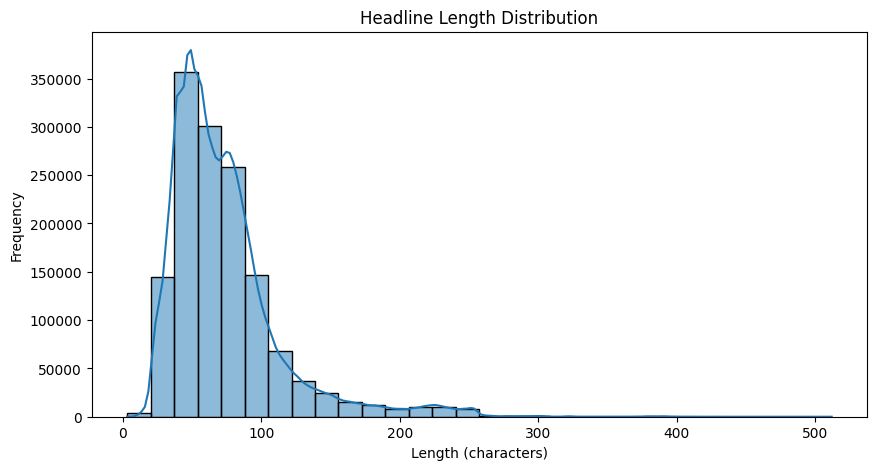

In [4]:
analyzer.headline_length_stats(df)

## **Number of Articles per publishers**

📰 Top Publishers by Number of Articles:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


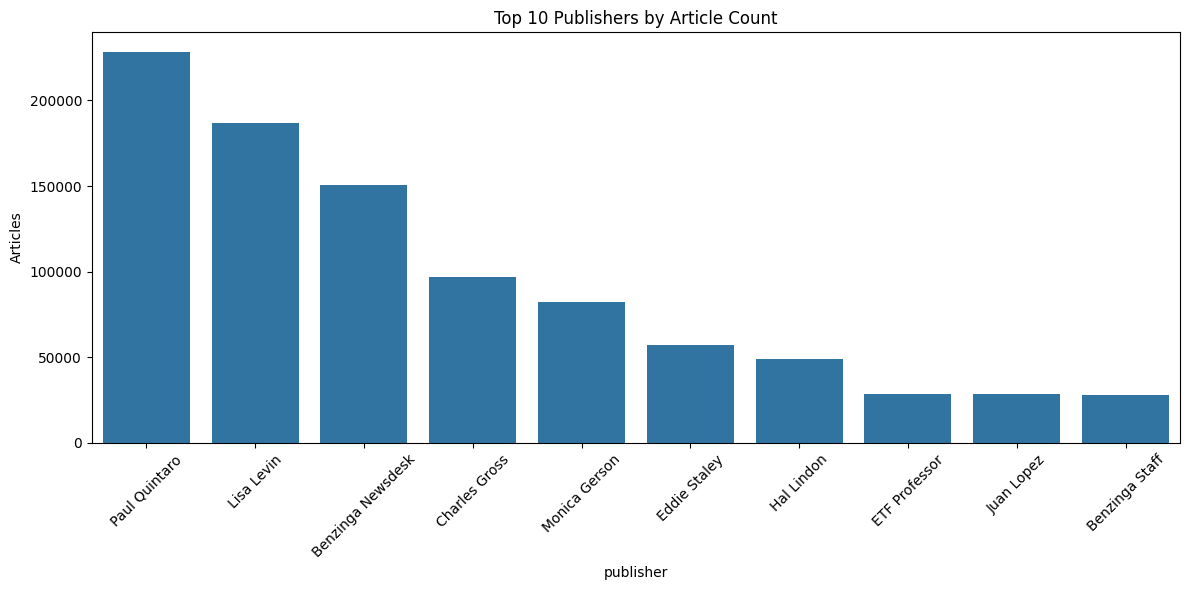

In [6]:
analyzer.articles_per_publisher(df)

📰 Top Publishers by Number of Articles:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


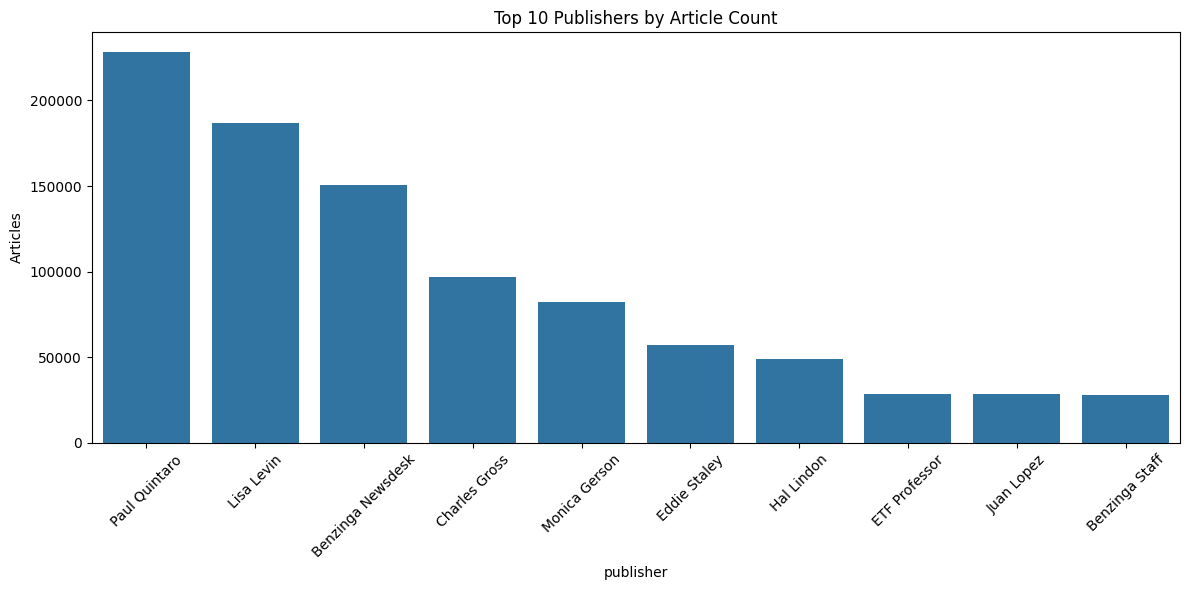

In [7]:
analyzer.articles_per_publisher(df)

## **Analyze publish date**

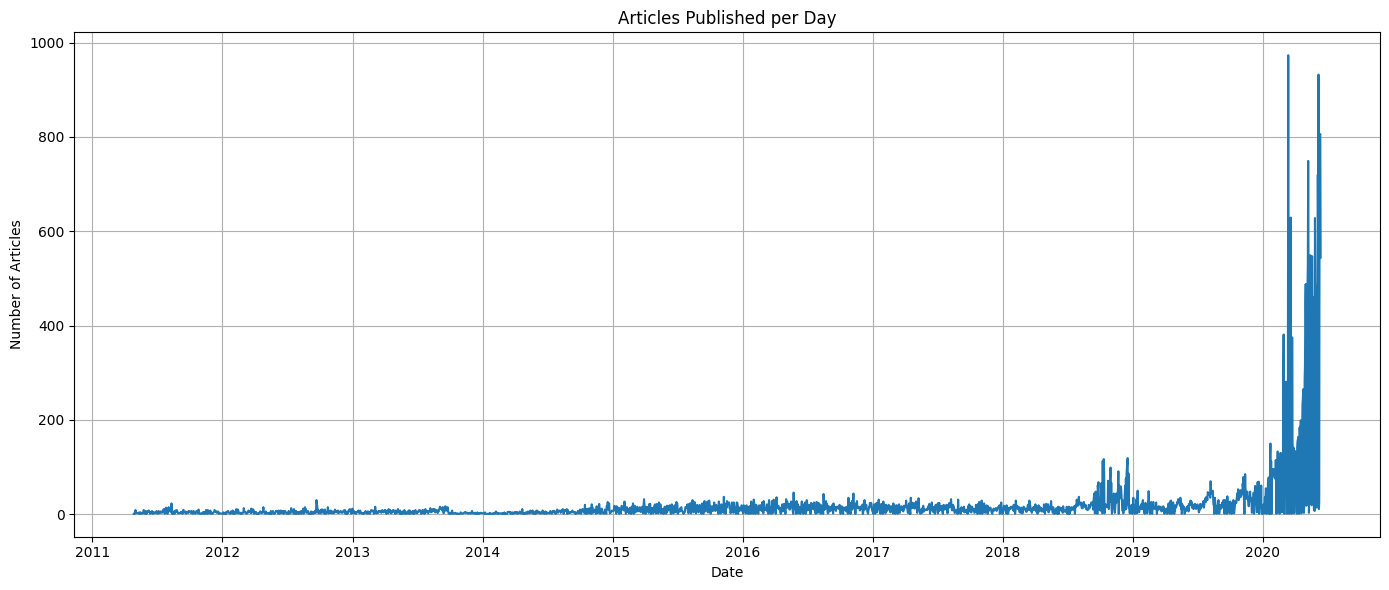

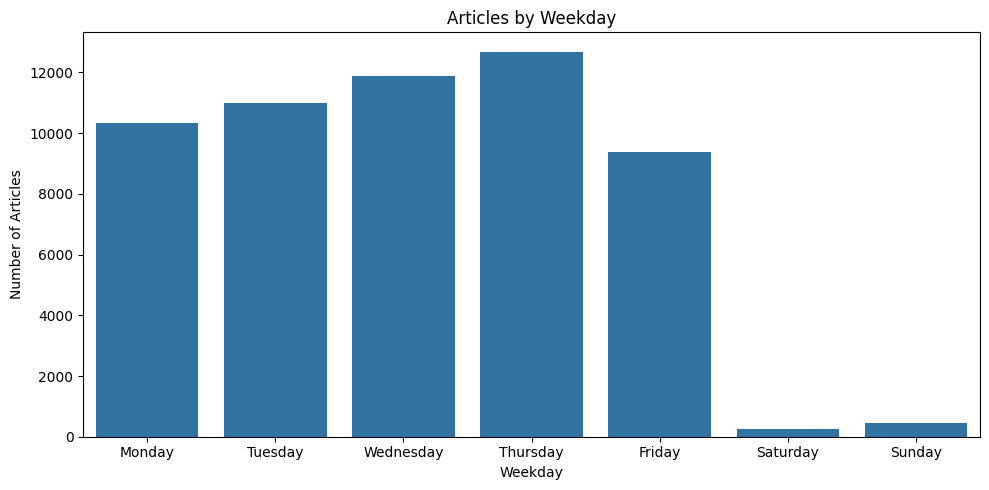

In [8]:
analyzer.publication_trends(df)